In [91]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
from sklearn.datasets import make_circles

num_of_samples = 1000

x, y = make_circles(num_of_samples, noise=0.03)
x

array([[-0.90461189,  0.4411592 ],
       [ 0.65836155, -0.70401963],
       [-0.95606575,  0.2192996 ],
       ...,
       [ 0.3555443 , -0.74168727],
       [ 0.98643206, -0.20967997],
       [-0.68026695, -0.75229852]])

In [93]:
circle = pd.DataFrame({
    "x0": x[:, 0],
    "x1": x[:, 1],
    "y": y
})
circle

,x0,x1,y
0,-0.904612,0.441159,0
1,0.658362,-0.704020,0
2,-0.956066,0.219300,0
3,-0.074051,1.041192,0
4,-0.703629,-0.412930,1
...,...,...,...
995,-0.948226,0.273210,0
996,-0.477612,0.671437,1
997,0.355544,-0.741687,1
998,0.986432,-0.209680,0


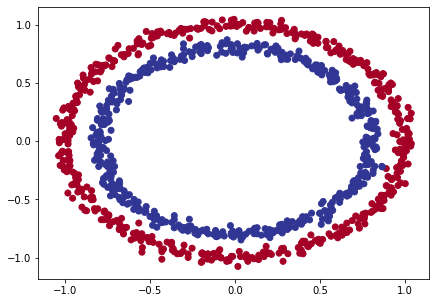

In [94]:
plt.figure(figsize=(7, 5))
plt.scatter(circle["x0"], circle["x1"], c=circle["y"], cmap=plt.cm.RdYlBu)

In [95]:
X = circle.drop(["y"], axis=1)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
EPOCHS = 100
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train, epochs=EPOCHS, verbose=0)

In [98]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (32, 1)                   3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [99]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.4700


[0.697755753993988, 0.4699999988079071]

In [100]:
def plot_history_curve(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  epochs = np.arange(0, len(loss))
  plt.figure(figsize=(7, 10))
  plt.subplot(2, 1, 1)
  plt.title("History")
  plt.plot(epochs, loss)
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.subplot(2, 1, 2)
  plt.plot(epochs, accuracy)
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()

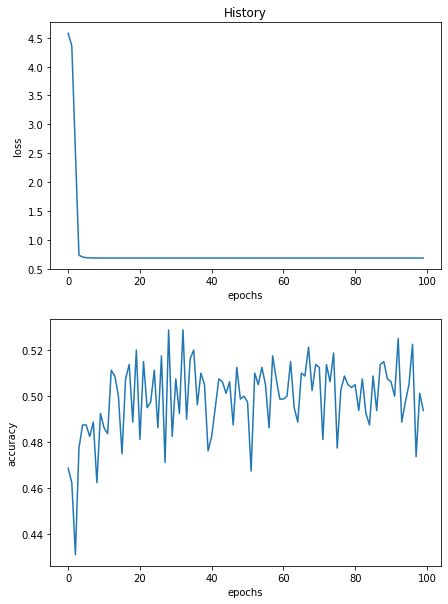

In [101]:
plot_history_curve(history_1)

In [102]:
EPOCHS = 200
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, epochs=EPOCHS, verbose=0)

In [103]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4350


[0.6955212354660034, 0.4350000023841858]

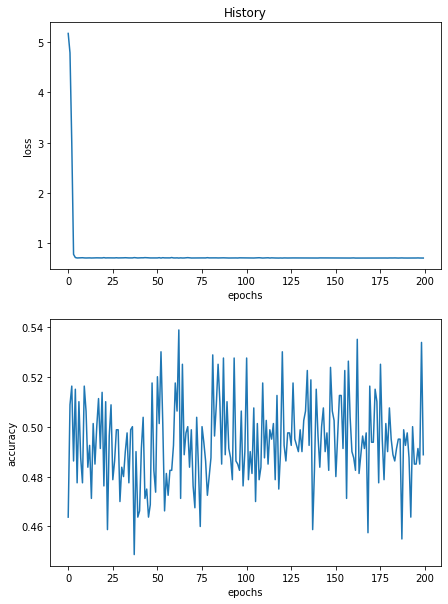

In [104]:
plot_history_curve(history_2)

In [140]:
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  # print(x_min, x_max)
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  # print(y_min, y_max)
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  print(yy)
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

[[-1.17655321 -1.17655321 -1.17655321 ... -1.17655321 -1.17655321
  -1.17655321]
 [-1.15309233 -1.15309233 -1.15309233 ... -1.15309233 -1.15309233
  -1.15309233]
 [-1.12963145 -1.12963145 -1.12963145 ... -1.12963145 -1.12963145
  -1.12963145]
 ...
 [ 1.09915214  1.09915214  1.09915214 ...  1.09915214  1.09915214
   1.09915214]
 [ 1.12261302  1.12261302  1.12261302 ...  1.12261302  1.12261302
   1.12261302]
 [ 1.1460739   1.1460739   1.1460739  ...  1.1460739   1.1460739
   1.1460739 ]]
doing binary classification...


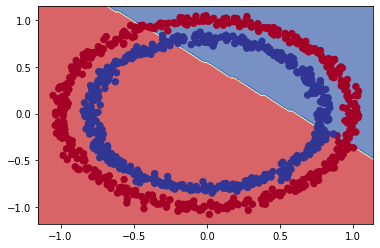

In [141]:
plot_decision_boundary(model_2, x, y)

In [142]:
a = np.array([0, 1, 2])
b = np.array([6, 7, 8, 9, 10, 11, 12])
a1, b1 = np.meshgrid(a, b)
print(a1)
print(b1)

[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
[[ 6  6  6]
 [ 7  7  7]
 [ 8  8  8]
 [ 9  9  9]
 [10 10 10]
 [11 11 11]
 [12 12 12]]


In [143]:
print(np.c_[a1.ravel(), b1.ravel()])

[[ 0  6]
 [ 1  6]
 [ 2  6]
 [ 0  7]
 [ 1  7]
 [ 2  7]
 [ 0  8]
 [ 1  8]
 [ 2  8]
 [ 0  9]
 [ 1  9]
 [ 2  9]
 [ 0 10]
 [ 1 10]
 [ 2 10]
 [ 0 11]
 [ 1 11]
 [ 2 11]
 [ 0 12]
 [ 1 12]
 [ 2 12]]


In [157]:
EPOCHS = 100
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=EPOCHS, verbose=0)

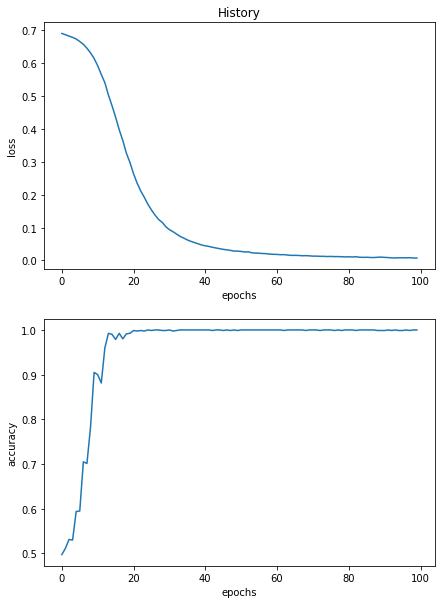

In [158]:
plot_history_curve(history_3)

In [159]:
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (32, 100)                 300       
                                                                 
 dense_40 (Dense)            (32, 10)                  1010      
                                                                 
 dense_41 (Dense)            (32, 1)                   11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [160]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 1.0000


[0.012375617399811745, 1.0]

[[-1.17655321 -1.17655321 -1.17655321 ... -1.17655321 -1.17655321
  -1.17655321]
 [-1.15309233 -1.15309233 -1.15309233 ... -1.15309233 -1.15309233
  -1.15309233]
 [-1.12963145 -1.12963145 -1.12963145 ... -1.12963145 -1.12963145
  -1.12963145]
 ...
 [ 1.09915214  1.09915214  1.09915214 ...  1.09915214  1.09915214
   1.09915214]
 [ 1.12261302  1.12261302  1.12261302 ...  1.12261302  1.12261302
   1.12261302]
 [ 1.1460739   1.1460739   1.1460739  ...  1.1460739   1.1460739
   1.1460739 ]]
doing binary classification...


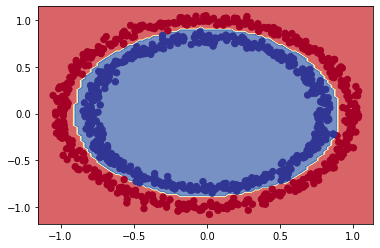

In [161]:
plot_decision_boundary(model_3, x, y)